# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')
previsao_de_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001868,0.002567,0.004003,0.015612,-0.004328,-0.002146,0.016628,0.019061,0.007646
index,-0.001868,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,0.002567,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,0.004003,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.015612,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.004328,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.019061,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.007646,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


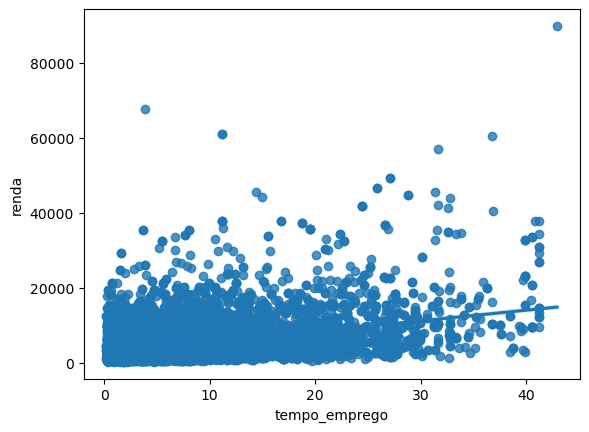

In [7]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = previsao_de_renda)
previsao_de_renda.corr()

In [11]:
previsao_de_renda_resumo = previsao_de_renda[['qtd_filhos', 'idade', 'tempo_emprego', 'renda']]
previsao_de_renda_resumo.head()

,qtd_filhos,idade,tempo_emprego,renda
0,1,36,3.575342,3369.24
1,0,42,0.860274,6096.14
2,2,31,8.065753,5658.98
3,0,50,1.208219,7246.69
4,0,52,13.873973,4017.37


In [16]:
previsao_de_renda_resumo.corr()

,qtd_filhos,idade,tempo_emprego,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.009567
idade,-0.364303,1.000000,0.323934,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,0.394235
renda,0.009567,0.042570,0.394235,1.000000


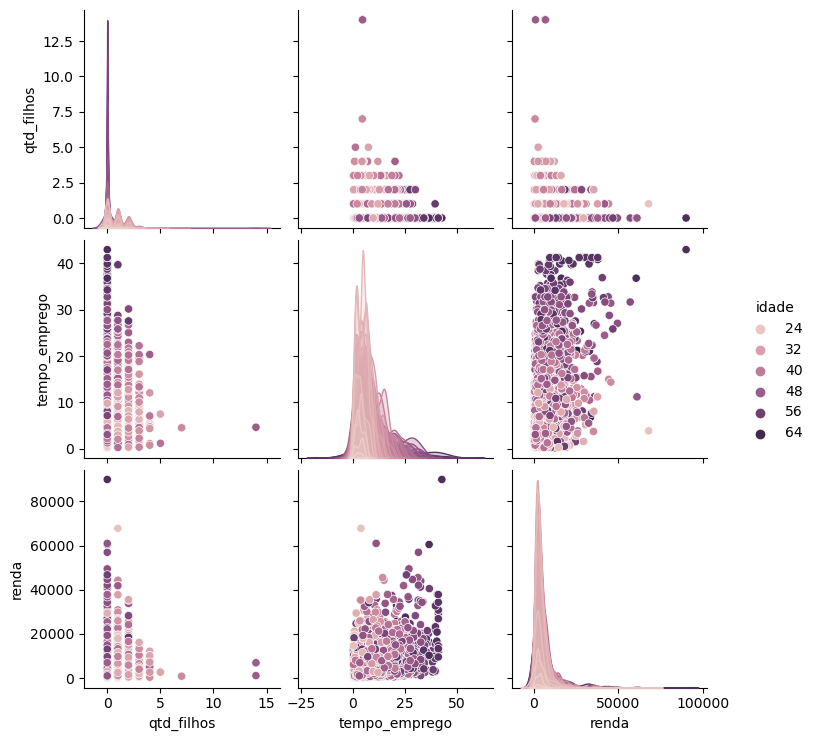

In [12]:
sns.pairplot(previsao_de_renda_resumo, hue='idade')

Existem alguns outliers nesse banco de dados. Geralmente pessoas mais velhas possuem maior tempo de empresa e também conseguem alcançar uma renda um pouco maior.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<AxesSubplot:xlabel='idade', ylabel='renda'>

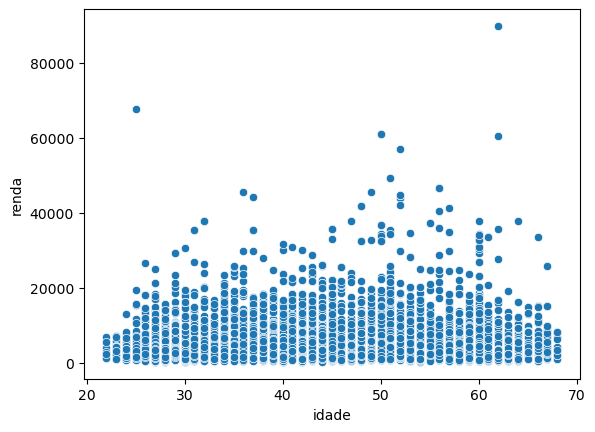

In [13]:
sns.scatterplot(data=previsao_de_renda_resumo, x="idade", y="renda")

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

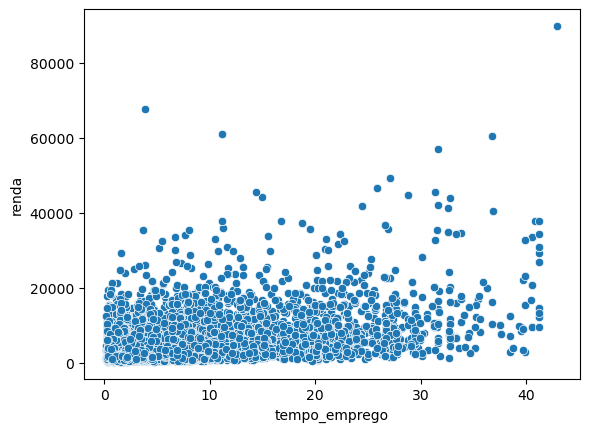

In [15]:
sns.scatterplot(data=previsao_de_renda_resumo, x="tempo_emprego", y="renda")

3) Na su aopinião, há outliers na variável renda?

Sim. Existe um valor acima de 80000 que talvez represente um outlier.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

C:\Users\lucca\AppData\Local\Temp\ipykernel_10608\3703900873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previsao_de_renda_resumo['log_renda'] = np.log(previsao_de_renda_resumo['renda'])


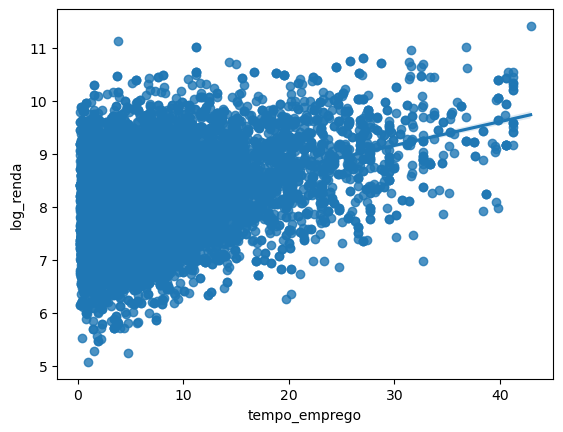

In [18]:
previsao_de_renda_resumo['log_renda'] = np.log(previsao_de_renda_resumo['renda'])

_ = sns.regplot(x='tempo_emprego', y='log_renda', data = previsao_de_renda_resumo)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [19]:
previsao_de_renda_resumo.corr()

,qtd_filhos,idade,tempo_emprego,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,0.394235,0.379556
renda,0.009567,0.042570,0.394235,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.835734,1.000000


Nesse caso a correlação entre renda e tempo_emprego caiu 2% aplicando o log na variável renda.

In [ ]:
previsao_de_renda_resumo.